<a href="https://colab.research.google.com/github/ImAli0/ML_and_DataScience/blob/main/17-Supervised-Learning-Capstone-Project/Supervised_Learning_Capstone_Tree_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning Capstone Project - Tree Methods Focus

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

## Data Check

In [2]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## EDA

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

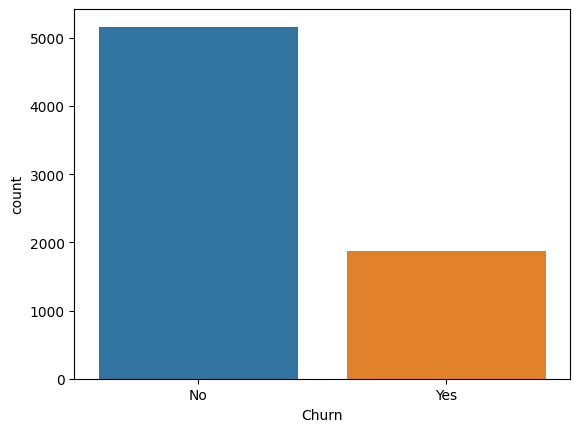

In [6]:
sns.countplot(df, x='Churn',hue='Churn');

<Axes: xlabel='Churn', ylabel='TotalCharges'>

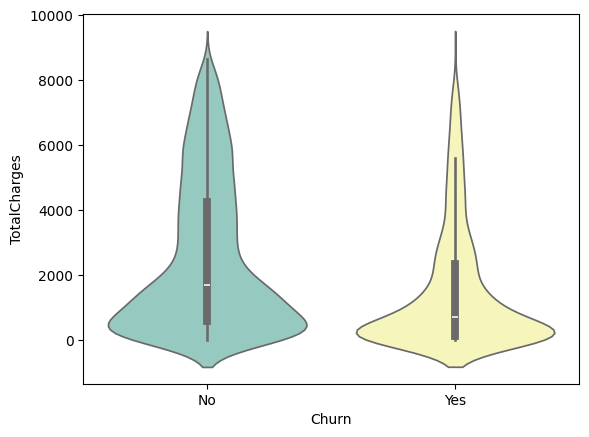

In [7]:
sns.violinplot(df, x='Churn', y='TotalCharges', hue='Churn', palette='Set3')

<Axes: xlabel='Contract', ylabel='TotalCharges'>

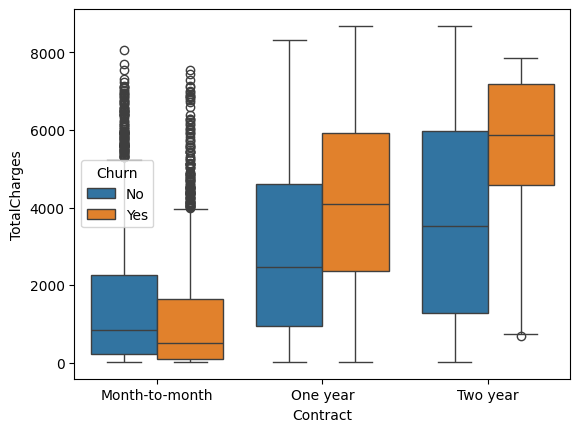

In [8]:
sns.boxplot(df, x='Contract', y='TotalCharges', hue='Churn')

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [11]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

In [12]:
corr_df = pd.DataFrame(corr_df['Churn_Yes'].sort_values(), index=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index)
corr_df

,Churn_Yes
Contract_Two year,-0.301552
StreamingMovies_No internet service,-0.227578
StreamingTV_No internet service,-0.227578
TechSupport_No internet service,-0.227578
DeviceProtection_No internet service,-0.227578
OnlineBackup_No internet service,-0.227578
OnlineSecurity_No internet service,-0.227578
InternetService_No,-0.227578
PaperlessBilling_No,-0.191454
Contract_One year,-0.178225


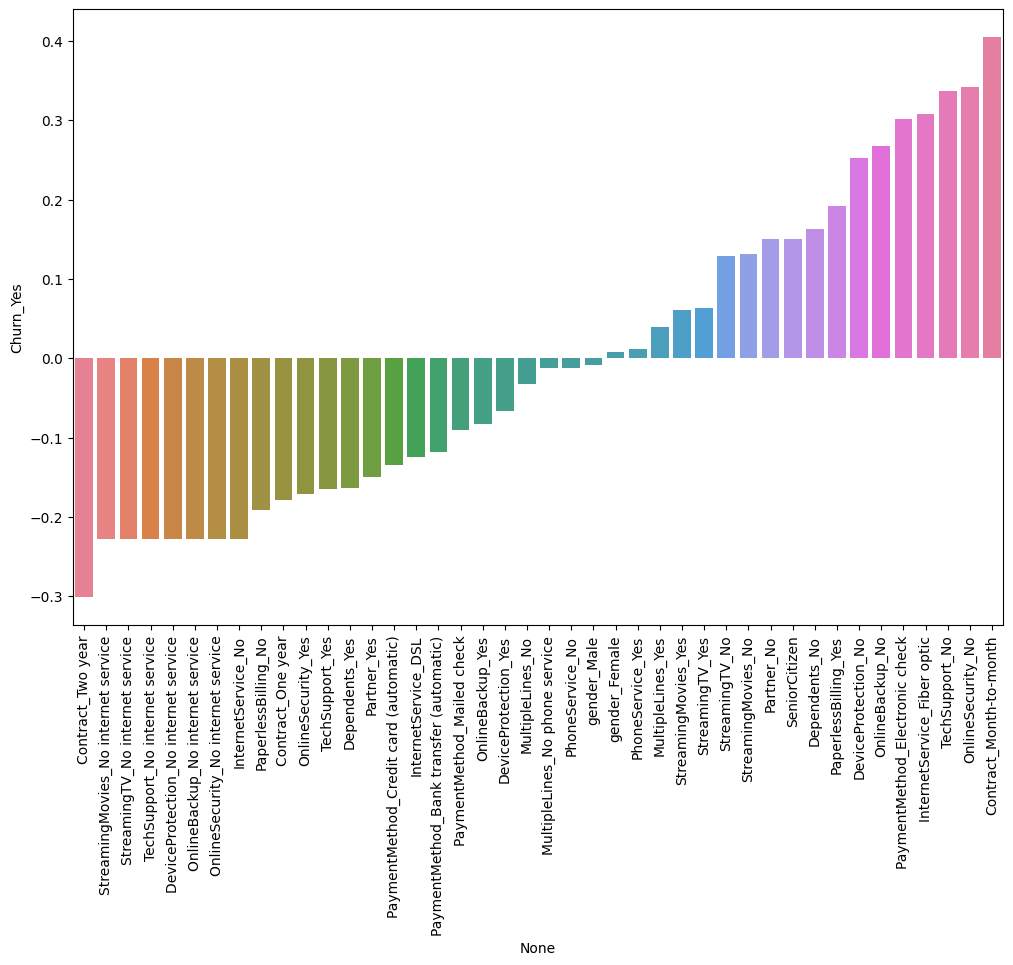

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(corr_df, x=corr_df.index, y='Churn_Yes', hue=corr_df.index, legend=False)
plt.xticks(rotation=90);

In [14]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

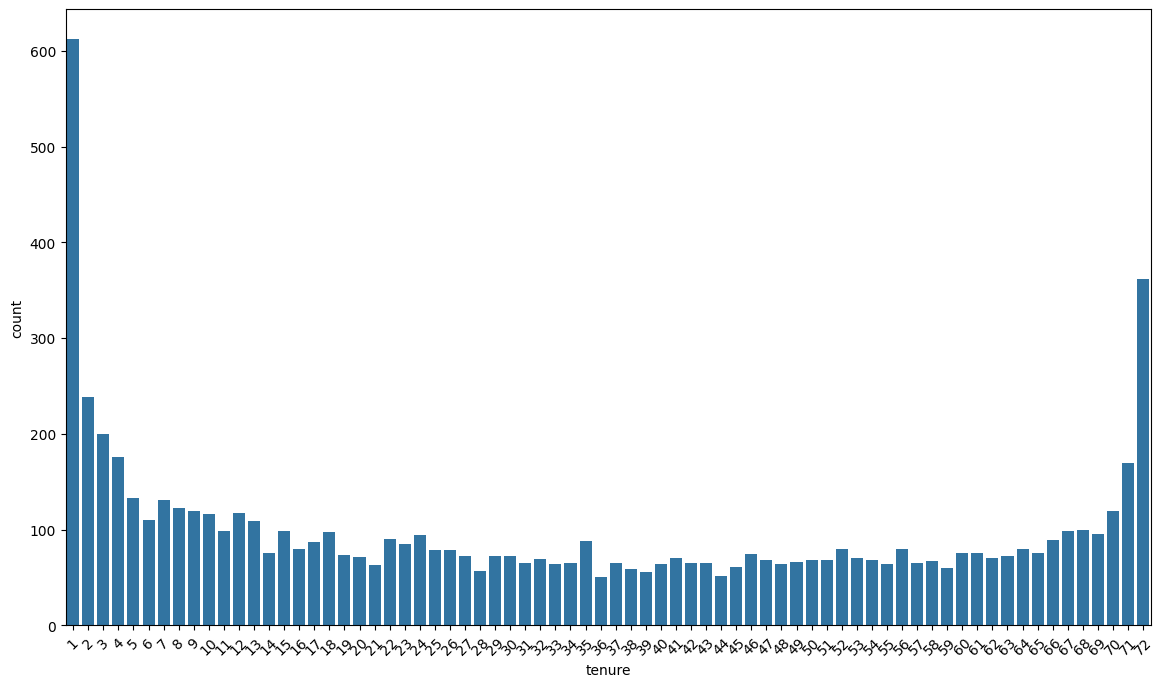

In [15]:
plt.figure(figsize=(14,8))
sns.countplot(df, x='tenure')
plt.xticks(rotation=45);

<Figure size 1000x300 with 0 Axes>

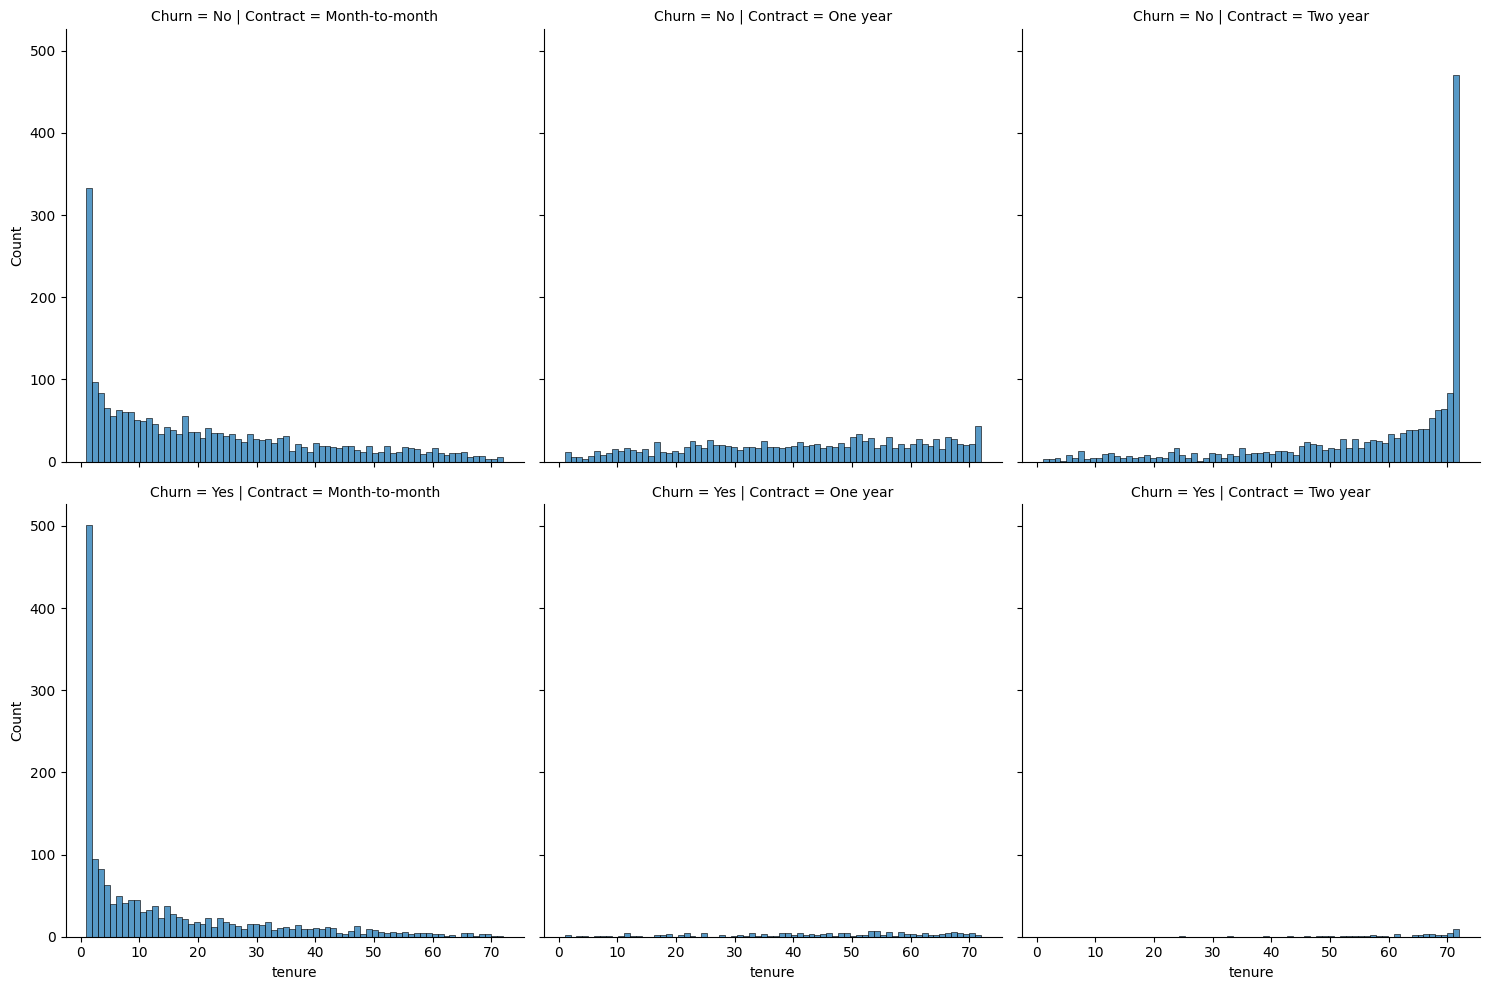

In [16]:
plt.figure(figsize=(10,3))
sns.displot(df, x='tenure', bins=70, row='Churn', col='Contract');

In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

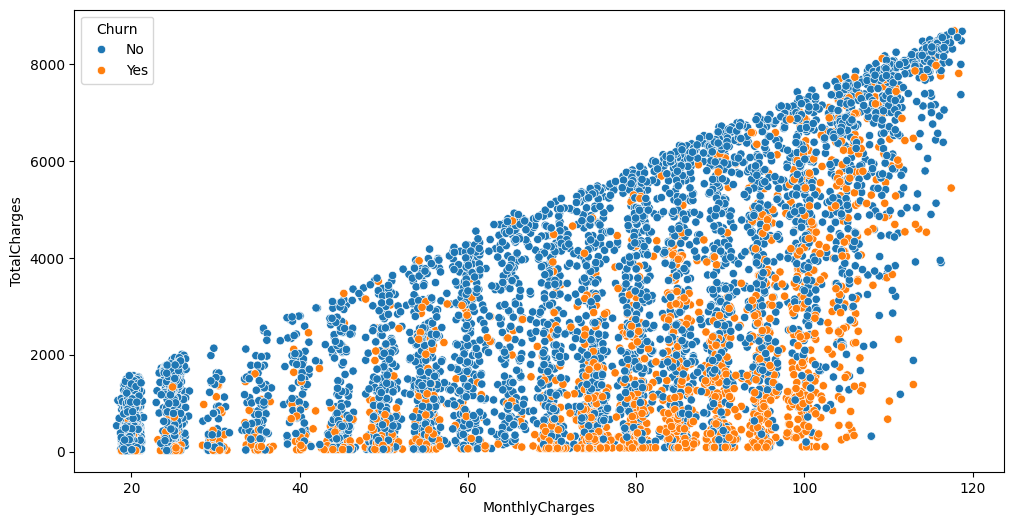

In [18]:
plt.figure(figsize=(12,6))
sns.scatterplot(df, x='MonthlyCharges', y='TotalCharges', hue='Churn');

In [19]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

In [20]:
df.groupby(['Churn','tenure'])
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [21]:
df.groupby(['Churn','tenure']).count()

customerID  gender  SeniorCitizen  Partner  Dependents  \
Churn tenure                                                           
No    1              233     233            233      233         233   
      2              115     115            115      115         115   
      3              106     106            106      106         106   
      4               93      93             93       93          93   
      5               69      69             69       69          69   
...                  ...     ...            ...      ...         ...   
Yes   68               9       9              9        9           9   
      69               8       8              8        8           8   
      70              11      11             11       11          11   
      71               6       6              6        6           6   
      72               6       6              6        6           6   

              PhoneService  MultipleLines  InternetService  OnlineSecurity  \
Churn tenure                                                                 
No    1                233            233              233             233   
      2                115            115              115             115   
      3                106            106              106             106   
      4                 93             93               93              93   
      5                 69             69               69              69   
...                    ...            ...              ...             ...   
Yes   68                 9              9                9               9   
      69                 8              8                8               8   
      70                11             11               11              11   
      71                 6              6                6               6   
      72                 6              6                6               6   

              OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
Churn tenure                                                             
No    1                233               233          233          233   
      2                115               115          115          115   
      3                106               106          106          106   
      4                 93                93           93           93   
      5                 69                69           69           69   
...                    ...               ...          ...          ...   
Yes   68                 9                 9            9            9   
      69                 8                 8            8            8   
      70                11                11           11           11   
      71                 6                 6            6            6   
      72                 6                 6            6            6   

              StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
Churn tenure                                                               
No    1                   233       233               233            233   
      2                   115       115               115            115   
      3                   106       106               106            106   
      4                    93        93                93             93   
      5                    69        69                69             69   
...                       ...       ...               ...            ...   
Yes   68                    9         9                 9              9   
      69                    8         8                 8              8   
      70                   11        11                11             11   
      71                    6         6                 6              6   
      72                    6         6                 6              6   

              MonthlyCharges  TotalCharges  
Churn tenure                                
No    1             

In [22]:
df.groupby(['Churn','tenure']).count().transpose()

Churn              No                                        ... Yes        \
tenure             1    2    3   4   5   6   7   8   9   10  ...  63 64 65   
customerID        233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
gender            233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
SeniorCitizen     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Partner           233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Dependents        233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PhoneService      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
MultipleLines     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
InternetService   233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
OnlineSecurity    233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
OnlineBackup      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
DeviceProtection  233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
TechSupport       233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
StreamingTV       233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
StreamingMovies   233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Contract          233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PaperlessBilling  233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PaymentMethod     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
MonthlyCharges    233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
TotalCharges      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   

Churn                                     
tenure            66  67 68 69  70 71 72  
customerID        13  10  9  8  11  6  6  
gender            13  10  9  8  11  6  6  
SeniorCitizen     13  10  9  8  11  6  6  
Partner           13  10  9  8  11  6  6  
Dependents        13  10  9  8  11  6  6  
PhoneService      13  10  9  8  11  6  6  
MultipleLines     13  10  9  8  11  6  6  
InternetService   13  10  9  8  11  6  6  
OnlineSecurity    13  10  9  8  11  6  6  
OnlineBackup      13  10  9  8  11  6  6  
DeviceProtection  13  10  9  8  11  6  6  
TechSupport       13  10  9  8  11  6  6  
StreamingTV       13  10  9  8  11  6  6  
StreamingMovies   13  10  9  8  11  6  6  
Contract          13  10  9  8  11  6  6  
PaperlessBilling  13  10  9  8  11  6  6  
PaymentMethod     13  10  9  8  11  6  6  
MonthlyCharges    13  10  9  8  11  6  6  
TotalCharges      13  10  9  8  11  6  6  

[19 rows x 144 columns]

In [23]:
df.groupby(['Churn','tenure']).count().transpose()['No']

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [24]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [25]:
no_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [26]:
churn_rate = 100 * yes_churn / (yes_churn + no_churn)
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

In [27]:
churn_rate.info

<bound method DataFrame.info of tenure                   1          2     3          4          5          6   \
customerID        61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
gender            61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
SeniorCitizen     61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
Partner           61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
Dependents        61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
PhoneService      61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
MultipleLines     61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
InternetService   61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
OnlineSecurity    61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
OnlineBackup      61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
DeviceProtection  61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
TechSupport       61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
StreamingTV       61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
StreamingMovies   61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
Contract          61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
PaperlessBilling  61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
PaymentMethod     61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
MonthlyCharges    61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
TotalCharges      61.990212  51.680672  47.0  47.159091  48.120301  36.363636   

tenure                   7          8          9          10  ...        63  \
customerID        38.931298  34.146341  38.655462  38.793103  ...  5.555556   
gender            38.931298  34.146341  38.655462  38.793103  ...  5.555556   
SeniorCitizen     38.931298  34.146341  38.655462  38.793103  ...  5.555556   
Partner           38.931298  34.146341  38.655462  38.793103  ...  5.555556   
Dependents        38.931298  34.146341  38.655462  38.793103  ...  5.555556   
PhoneService      38.931298  34.146341  38.655462  38.793103  ...  5.555556   
MultipleLines     38.931298  34.146341  38.655462  38.793103  ...  5.555556   
InternetService   38.931298  34.146341  38.655462  38.793103  ...  5.555556   
OnlineSecurity    38.931298  34.146341  38.655462  38.793103  ...  5.555556   
OnlineBackup      38.931298  34.146341  38.655462  38.793103  ...  5.555556   
DeviceProtection  38.931298  34.146341  38.655462  38.793103  ...  5.555556   
TechSupport       38.931298  34.146341  38.655462  38.793103  ...  5.555556   
StreamingTV       38.931298  34.146341  38.655462  38.793103  ...  5.555556   
StreamingMovies   38.931298  34.146341  38.655462  38.793103  ...  5.555556   
Contract          38.931298  34.146341  38.655462  38.793103  ...  5.555556   
PaperlessBilling  38.931298  34.146341  38.655462  38.793103  ...  5.555556   
PaymentMethod     38.931298  34.146341  38.655462  38.793103  ...  5.555556   
MonthlyCharges    38.931298  34.146341  38.655462  38.793103  ...  5.555556   
TotalCharges      38.931298  34.146341  38.655462  38.793103  ...  5.555556   

tenure             64         65         66         67   68        69  \
customerID        5.0  11.842105  14.606742  10.204082  9.0  8.421053   
gender            5.0  11.842105  14.606742  10.204082  9.0  8.421053   
SeniorCitizen     5.0  11.842105  14.606742  10.204082  9.0  8.421053   
Partner           5.0  11.842105  14.606742  10.204082  9.0  8.421053   
Dependents        5.0  11.842105  14.606742  10.204082  9.0  8.421053   
PhoneService      5.0  11.842105  14.606742  10.204082  9.0  8.421053   
MultipleLines     5.0  11.842105  14.606742  10.204082  9.0  8.421053   
InternetService   5.0  11.842105  14.606742  10.204082  9.0  8.421053   
OnlineSecurity    5.0  11.842105  14.606742  10.204082  9.0  8.421053   
OnlineBackup      5.0  11.842105  14

In [28]:
churn_rate

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
gender,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
SeniorCitizen,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Partner,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Dependents,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
PhoneService,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
MultipleLines,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
InternetService,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
OnlineSecurity,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
OnlineBackup,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459


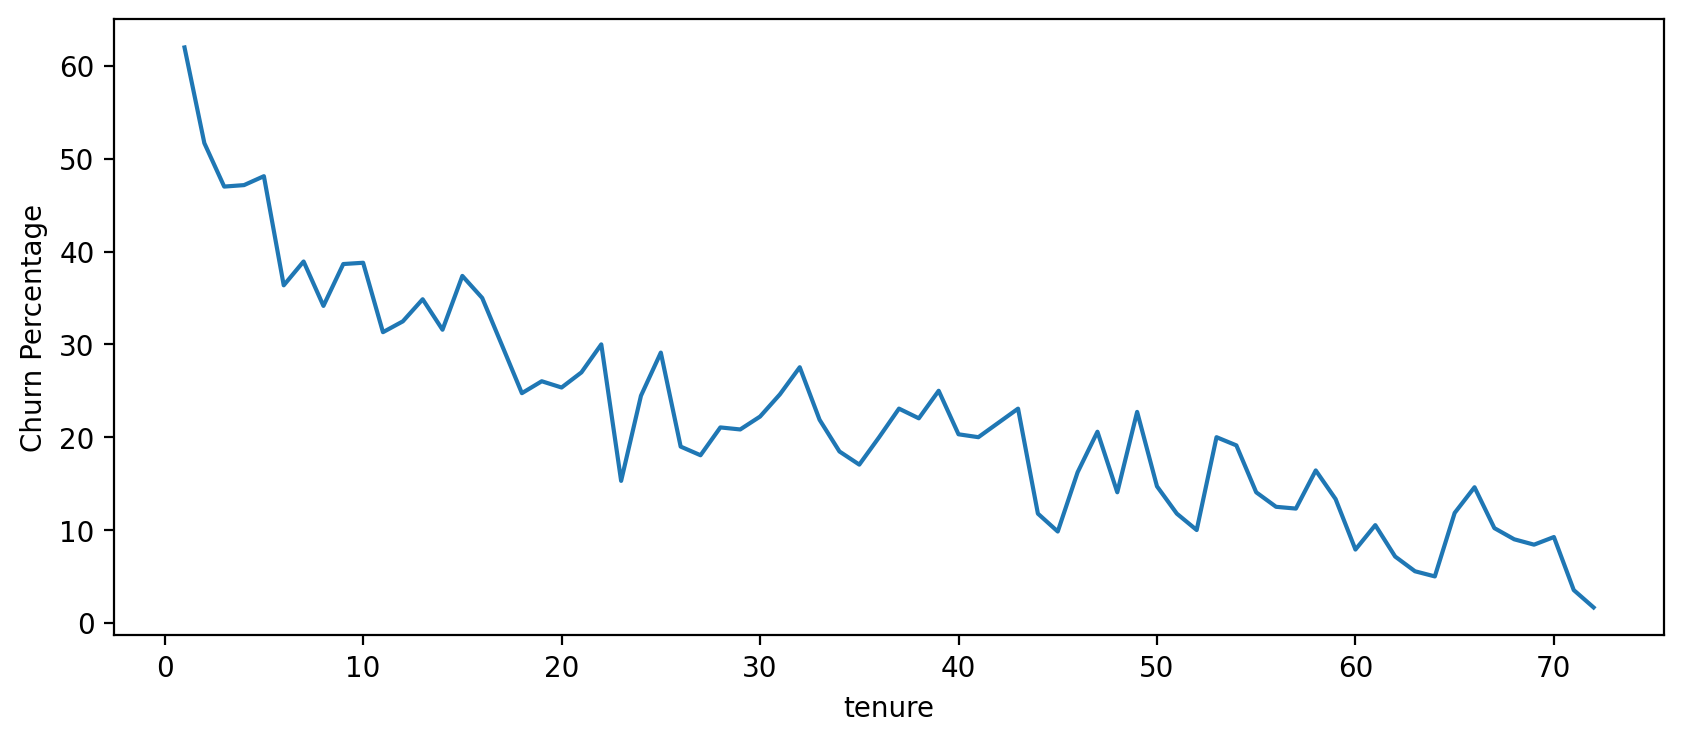

In [29]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

In [30]:
def cohort(tenure):
  if tenure < 13:
    return '0-12 Months'
  elif tenure < 25:
    return '12-24 Months'
  elif tenure < 48:
    return '24-48 Months'
  else:
    return 'Over 48 Months'

df['Tenure Cohort'] = df['tenure'].apply(cohort)
df[['tenure', 'Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,12-24 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


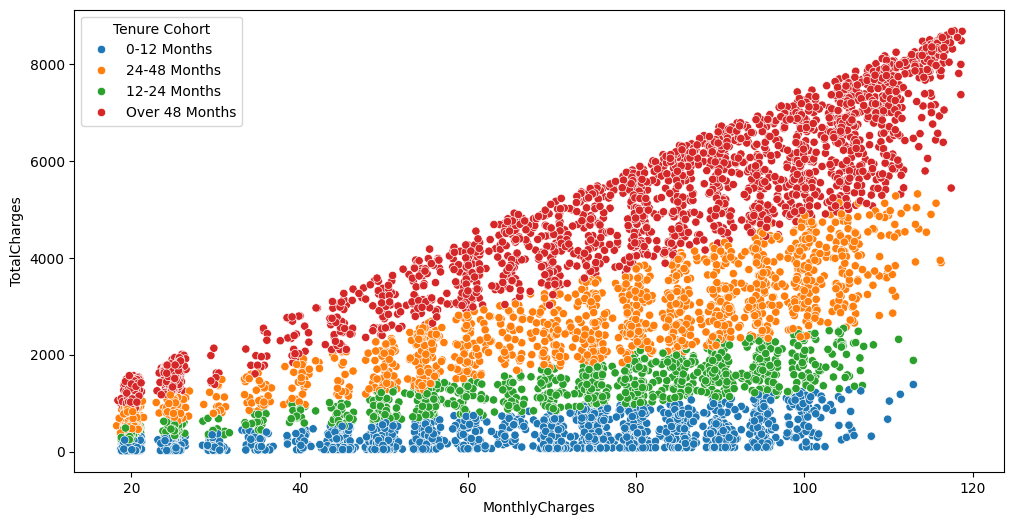

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort');

<Axes: xlabel='Tenure Cohort', ylabel='count'>

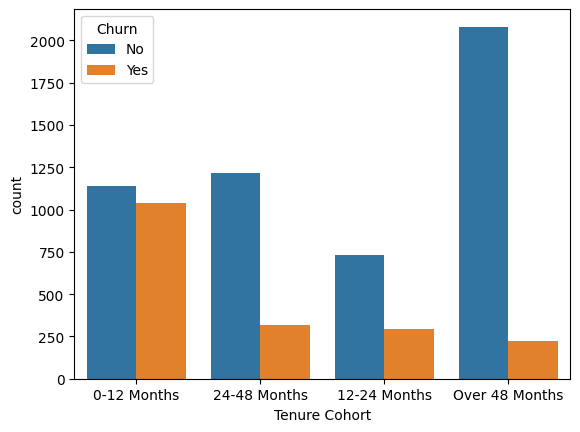

In [32]:
sns.countplot(df, x='Tenure Cohort', hue='Churn')

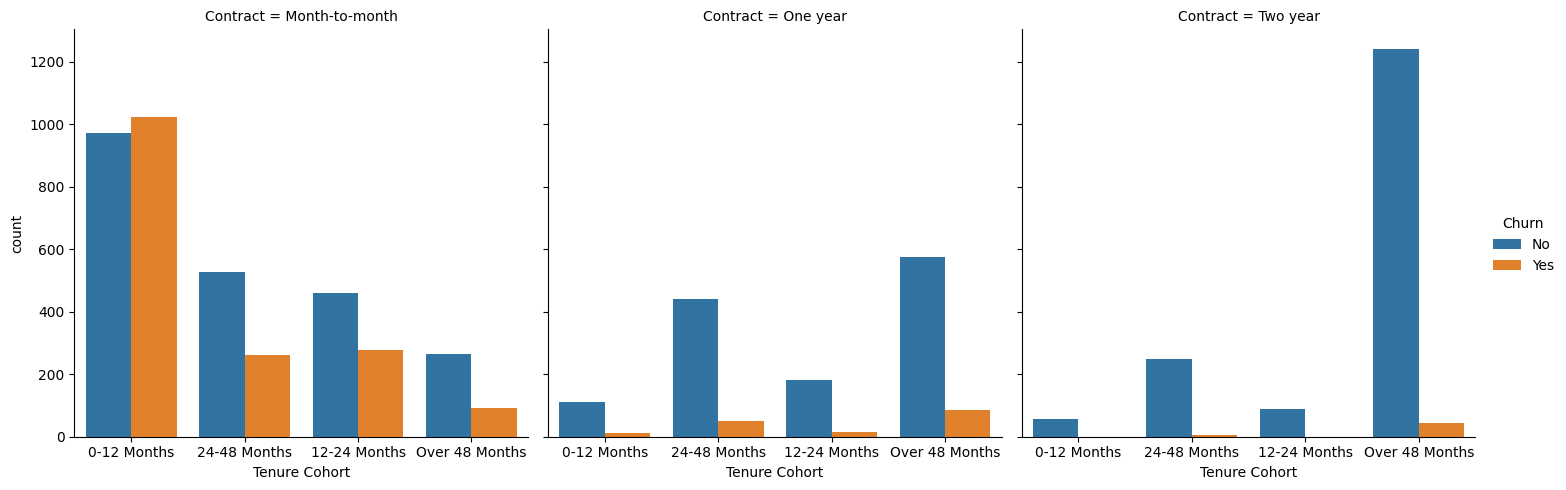

In [33]:
sns.catplot(df, x='Tenure Cohort', col='Contract', hue='Churn', kind='count')

# Predictive Modeling
## Single Decision Tree

In [34]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months


In [35]:
X = df.drop(['Churn', 'customerID'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['Churn']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

              precision    recall  f1-score   support

          No       0.83      0.91      0.86       516
         Yes       0.65      0.48      0.55       188

    accuracy                           0.79       704
   macro avg       0.74      0.69      0.71       704
weighted avg       0.78      0.79      0.78       704



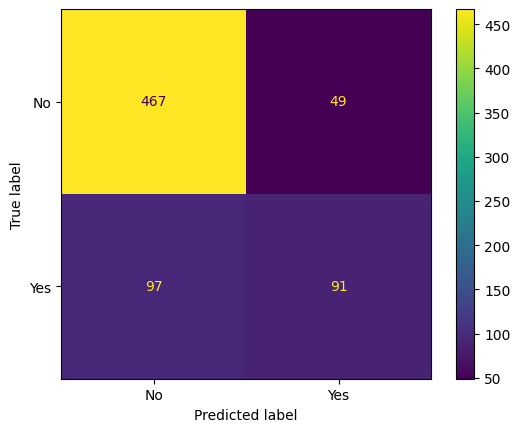

In [37]:
tree_model = DecisionTreeClassifier(max_depth=6)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)
print(classification_report(y_test, tree_preds))
ConfusionMatrixDisplay.from_predictions(y_test, tree_preds)

In [38]:
tree_model.feature_importances_

array([1.66974800e-02, 4.36350060e-01, 2.12195761e-02, 4.88201327e-02,
       1.26728647e-03, 0.00000000e+00, 3.27978566e-03, 6.61440491e-03,
       2.61226784e-03, 1.68468113e-02, 3.07271332e-01, 1.26315293e-02,
       0.00000000e+00, 9.77328538e-03, 0.00000000e+00, 5.73848553e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.04716458e-03,
       0.00000000e+00, 2.40000159e-03, 1.99451791e-02, 4.34591126e-03,
       2.35443569e-02, 2.16106404e-02, 1.00852353e-02, 1.90759285e-04,
       2.19501742e-02, 1.75814031e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [39]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure Cohort'],
      dtype='object')

In [40]:
imp_feats = pd.DataFrame(data=tree_model.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")

In [41]:
imp_feats

,Feature Importance
DeviceProtection_No internet service,0.000000
Tenure Cohort_12-24 Months,0.000000
StreamingTV_No internet service,0.000000
TechSupport_No internet service,0.000000
DeviceProtection_Yes,0.000000
Tenure Cohort_24-48 Months,0.000000
OnlineBackup_No internet service,0.000000
OnlineSecurity_No internet service,0.000000
Tenure Cohort_Over 48 Months,0.000000
Partner_Yes,0.000000


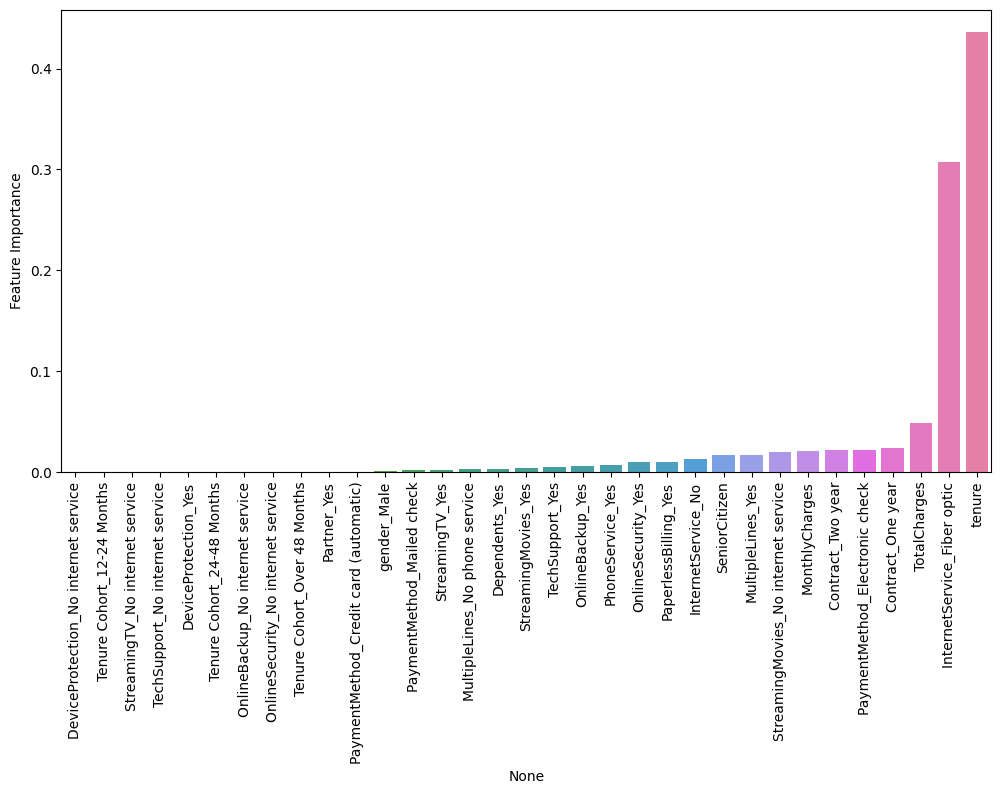

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(imp_feats, x=imp_feats.index, y='Feature Importance', hue=imp_feats.index, legend=False)
plt.xticks(rotation = 90);

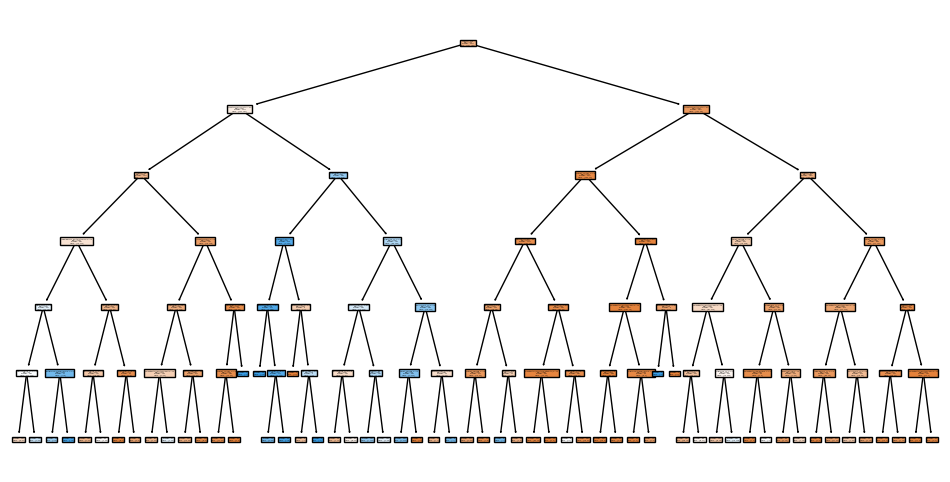

In [43]:
plt.figure(figsize=(12,6))
plot_tree(tree_model, filled=True, feature_names=X.columns);

## Random Forest

              precision    recall  f1-score   support

          No       0.82      0.91      0.87       516
         Yes       0.66      0.46      0.54       188

    accuracy                           0.79       704
   macro avg       0.74      0.69      0.70       704
weighted avg       0.78      0.79      0.78       704



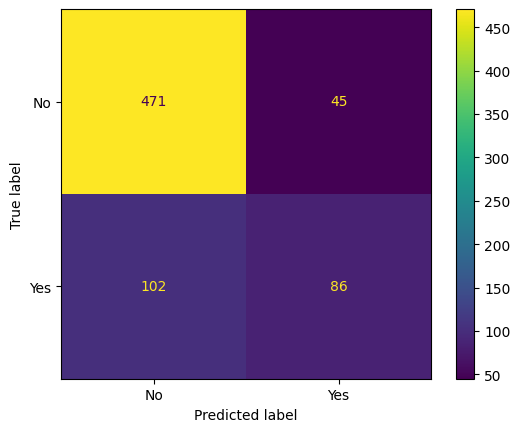

In [44]:
rfm = RandomForestClassifier(n_estimators=100)
rfm.fit(X_train, y_train)
rfm_preds = rfm.predict(X_test)
print(classification_report(y_test, rfm_preds))
ConfusionMatrixDisplay.from_predictions(y_test, rfm_preds);

# AdaBoost

              precision    recall  f1-score   support

          No       0.84      0.90      0.87       516
         Yes       0.67      0.54      0.60       188

    accuracy                           0.81       704
   macro avg       0.76      0.72      0.73       704
weighted avg       0.80      0.81      0.80       704



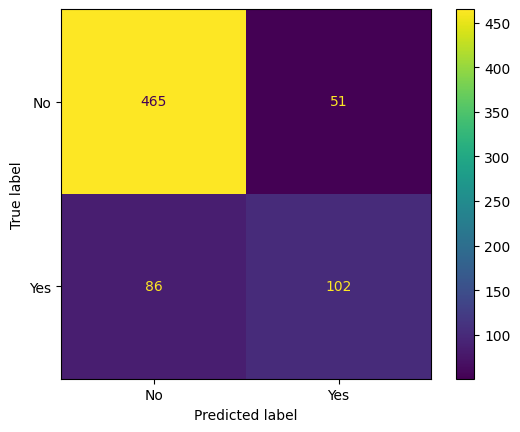

In [45]:
abt = AdaBoostClassifier()
abt.fit(X_train, y_train)
abt_preds = abt.predict(X_test)
print(classification_report(y_test, abt_preds))
ConfusionMatrixDisplay.from_predictions(y_test, abt_preds)